## Advanced Regression on House Rent Prediction

In [1]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

### Cleaning the Data

In [2]:
# loading the datasets
train_df = pd.read_csv('Data\\train_data.csv')
test_df = pd.read_csv('Data\\test_data.csv')

In [3]:
# peeking the dataset
train_df.head()

,Bedrooms,Paid User,Locality,Property Type,User Type,Prime Location,Other,Price
0,2,N,Patancheru,Residential House,Owner,Y,***carpet area*2500 sqft****status*Ready to Mo...,1.10 Cr
1,2,N,"Ramanthapur, NH 2 2",Apartment,Owner,Y,***carpet area*1007 sqft****status*Ready to Mo...,50 Lac
2,2,N,Malkajgiri,Apartment,Owner,Y,***super area*1045 sqft****status*Ready to Mov...,49 Lac
3,3,Y,"Manikonda, Outer Ring Road",Apartment,Builder,Y,***super area*1640 sqft****status**\t\t\t\t\t\...,1.06 Cr
4,3,Y,Aminpur,Apartment,Builder,Y,***super area*1039 sqft****status**\t\t\t\t\t\...,46.2 Lac


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10762 entries, 0 to 10761
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Bedrooms        10762 non-null  object
 1   Paid User       10762 non-null  object
 2   Locality        10762 non-null  object
 3   Property Type   10762 non-null  object
 4   User Type       10762 non-null  object
 5   Prime Location  10762 non-null  object
 6   Other           10762 non-null  object
 7   Price           10762 non-null  object
dtypes: object(8)
memory usage: 672.8+ KB


In [5]:
train_df.isnull().sum()

Bedrooms          0
Paid User         0
Locality          0
Property Type     0
User Type         0
Prime Location    0
Other             0
Price             0
dtype: int64

In [6]:
train_df['Other'].iloc[1]

'***carpet area*1007\xa0sqft****status*Ready to Move****floor*1 out of 4 floors***transaction*Resale***furnishing*Semi-Furnished***facing*East***car parking*1 Covered***bathroom*2***balcony*2***ownership*Freehold**'

In [7]:
# Define a function to extract values for each attribute
def extract_property_info(df):
    # Extract information from 'Other' column
    df['carpet area'] = df['Other'].str.extract(r'\*carpet area\*([^*]+)\*')
    df['status'] = df['Other'].str.extract(r'\*status\*([^*]+)\*')
    df['transaction'] = df['Other'].str.extract(r'\*transaction\*([^*]+)\*')
    df['overlooking'] = df['Other'].str.extract(r'\*overlooking\*([^*]+)\*')
    df['facing'] = df['Other'].str.extract(r'\*facing\*([^*]+)\*')
    df['bathroom'] = df['Other'].str.extract(r'\*bathroom\*([^*]+)\*')
    df['balcony'] = df['Other'].str.extract(r'\*balcony\*([^*]+)\*')
    df['furnishing'] = df['Other'].str.extract(r'\*furnishing\*([^*]+)\*')

    # Drop the original 'Other' column
    df.drop(columns=['Other'], inplace=True)

    # Convert numeric columns to numeric type
    numeric_columns = ['carpet area', 'bathroom', 'balcony']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    return df

# Apply the function to train_df and test_df
train_df = extract_property_info(train_df)
test_df = extract_property_info(test_df)

In [8]:
train_df.isnull().sum()

Bedrooms              0
Paid User             0
Locality              0
Property Type         0
User Type             0
Prime Location        0
Price                 0
carpet area       10762
status             3560
transaction           1
overlooking        7731
facing             6121
bathroom            252
balcony            5631
furnishing          250
dtype: int64

In [9]:
train_df.drop(columns=['carpet area', 'overlooking', 'balcony', 'facing', 'status'], inplace=True)
test_df.drop(columns=['carpet area', 'overlooking', 'balcony', 'facing', 'status'], inplace=True)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10762 entries, 0 to 10761
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedrooms        10762 non-null  object 
 1   Paid User       10762 non-null  object 
 2   Locality        10762 non-null  object 
 3   Property Type   10762 non-null  object 
 4   User Type       10762 non-null  object 
 5   Prime Location  10762 non-null  object 
 6   Price           10762 non-null  object 
 7   transaction     10761 non-null  object 
 8   bathroom        10510 non-null  float64
 9   furnishing      10512 non-null  object 
dtypes: float64(1), object(9)
memory usage: 840.9+ KB


<Axes: >

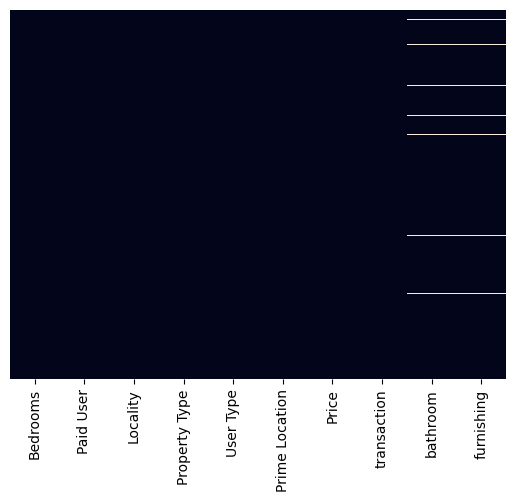

In [11]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False)

In [12]:
train_df.isnull().sum()

Bedrooms            0
Paid User           0
Locality            0
Property Type       0
User Type           0
Prime Location      0
Price               0
transaction         1
bathroom          252
furnishing        250
dtype: int64

In [13]:
train_df['bathroom'] = train_df['bathroom'].fillna(train_df['bathroom'].mode()[0])
test_df['bathroom'] = test_df['bathroom'].fillna(test_df['bathroom'].mode()[0])
train_df['furnishing'] = train_df['furnishing'].fillna(train_df['furnishing'].mode()[0])
test_df['furnishing'] = test_df['furnishing'].fillna(test_df['furnishing'].mode()[0])

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10762 entries, 0 to 10761
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedrooms        10762 non-null  object 
 1   Paid User       10762 non-null  object 
 2   Locality        10762 non-null  object 
 3   Property Type   10762 non-null  object 
 4   User Type       10762 non-null  object 
 5   Prime Location  10762 non-null  object 
 6   Price           10762 non-null  object 
 7   transaction     10761 non-null  object 
 8   bathroom        10762 non-null  float64
 9   furnishing      10762 non-null  object 
dtypes: float64(1), object(9)
memory usage: 840.9+ KB


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2691 entries, 0 to 2690
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedrooms        2691 non-null   object 
 1   Paid User       2691 non-null   object 
 2   Locality        2691 non-null   object 
 3   Property Type   2691 non-null   object 
 4   User Type       2691 non-null   object 
 5   Prime Location  2691 non-null   object 
 6   Price           2691 non-null   object 
 7   transaction     2691 non-null   object 
 8   bathroom        2691 non-null   float64
 9   furnishing      2691 non-null   object 
dtypes: float64(1), object(9)
memory usage: 210.4+ KB


In [16]:
train_df = train_df.dropna(subset=['transaction']).reset_index(drop=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10761 entries, 0 to 10760
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedrooms        10761 non-null  object 
 1   Paid User       10761 non-null  object 
 2   Locality        10761 non-null  object 
 3   Property Type   10761 non-null  object 
 4   User Type       10761 non-null  object 
 5   Prime Location  10761 non-null  object 
 6   Price           10761 non-null  object 
 7   transaction     10761 non-null  object 
 8   bathroom        10761 non-null  float64
 9   furnishing      10761 non-null  object 
dtypes: float64(1), object(9)
memory usage: 840.8+ KB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2691 entries, 0 to 2690
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedrooms        2691 non-null   object 
 1   Paid User       2691 non-null   object 
 2   Locality        2691 non-null   object 
 3   Property Type   2691 non-null   object 
 4   User Type       2691 non-null   object 
 5   Prime Location  2691 non-null   object 
 6   Price           2691 non-null   object 
 7   transaction     2691 non-null   object 
 8   bathroom        2691 non-null   float64
 9   furnishing      2691 non-null   object 
dtypes: float64(1), object(9)
memory usage: 210.4+ KB


### Handling Categorical features

In [18]:
unique_counts = train_df.nunique()
print(unique_counts)

Bedrooms            11
Paid User            2
Locality          1011
Property Type        5
User Type            3
Prime Location       1
Price              571
transaction          2
bathroom            10
furnishing           3
dtype: int64


In [19]:
train_df.drop(columns=['Prime Location'], inplace=True)
test_df.drop(columns=['Prime Location'], inplace=True)

In [20]:
categorical_columns = ['Bedrooms', 'Paid User', 'Property Type', 'User Type', 'transaction', 'bathroom', 'furnishing']

In [21]:
len(categorical_columns)

7

In [22]:
# concatenate the test and train
main_df = train_df.copy()
final_df = pd.concat([train_df, test_df], axis=0)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13452 entries, 0 to 2690
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       13452 non-null  object 
 1   Paid User      13452 non-null  object 
 2   Locality       13452 non-null  object 
 3   Property Type  13452 non-null  object 
 4   User Type      13452 non-null  object 
 5   Price          13452 non-null  object 
 6   transaction    13452 non-null  object 
 7   bathroom       13452 non-null  float64
 8   furnishing     13452 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.0+ MB


In [23]:
# function to encode categorical features easily
def category_onehot_multcols(multcolumns):
    df_final = final_df
    i = 0
    for fields in multcolumns:
        print(fields)
        df1 = pd.get_dummies(final_df[fields], drop_first=True)
        
        final_df.drop([fields], axis=1, inplace=True)
        
        if i == 0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final, df1], axis=1)
            
        i = i + 1
        
    df_final = pd.concat([final_df, df_final], axis=1)
    return df_final

In [24]:
final_df = category_onehot_multcols(categorical_columns)

Bedrooms
Paid User
Property Type
User Type
transaction
bathroom
furnishing


In [25]:
final_df.head()

,Locality,Price,10,2,3,4,5,6,7,8,...,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Semi-Furnished,Unfurnished
0,Patancheru,1.10 Cr,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,"Ramanthapur, NH 2 2",50 Lac,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,Malkajgiri,49 Lac,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,"Manikonda, Outer Ring Road",1.06 Cr,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,Aminpur,46.2 Lac,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [26]:
final_df.shape

(13452, 31)

In [27]:
final_df = final_df.loc[:, ~final_df.columns.duplicated()]
final_df

,Locality,Price,10,2,3,4,5,6,7,8,...,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Semi-Furnished,Unfurnished
0,Patancheru,1.10 Cr,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,"Ramanthapur, NH 2 2",50 Lac,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,Malkajgiri,49 Lac,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,"Manikonda, Outer Ring Road",1.06 Cr,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,Aminpur,46.2 Lac,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,"Miyapur, NH 9",36 Lac,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2687,"Vishnupuri Colony, Secunderabad",95 Lac,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2688,"P & T Colony-Dilsukh Nagar, NH 9",28 Lac,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2689,Balaji Nagar Miyapur,55 Lac,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [28]:
df_train = final_df.iloc[:10762, :]
df_test = final_df.iloc[10762:, :]

In [29]:
df_test_actual = df_test['Price']
df_test.drop(columns=['Price'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8496\3199911517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['Price'], inplace=True)


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10762 entries, 0 to 0
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Locality                 10762 non-null  object
 1   Price                    10762 non-null  object
 2   10                       10762 non-null  bool  
 3   2                        10762 non-null  bool  
 4   3                        10762 non-null  bool  
 5   4                        10762 non-null  bool  
 6   5                        10762 non-null  bool  
 7   6                        10762 non-null  bool  
 8   7                        10762 non-null  bool  
 9   8                        10762 non-null  bool  
 10  9                        10762 non-null  bool  
 11  > 10                     10762 non-null  bool  
 12  Y                        10762 non-null  bool  
 13  Builder Floor Apartment  10762 non-null  bool  
 14  Penthouse                10762 non-null  bool  

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10762 entries, 0 to 0
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Locality                 10762 non-null  object
 1   Price                    10762 non-null  object
 2   10                       10762 non-null  bool  
 3   2                        10762 non-null  bool  
 4   3                        10762 non-null  bool  
 5   4                        10762 non-null  bool  
 6   5                        10762 non-null  bool  
 7   6                        10762 non-null  bool  
 8   7                        10762 non-null  bool  
 9   8                        10762 non-null  bool  
 10  9                        10762 non-null  bool  
 11  > 10                     10762 non-null  bool  
 12  Y                        10762 non-null  bool  
 13  Builder Floor Apartment  10762 non-null  bool  
 14  Penthouse                10762 non-null  bool  

In [32]:
import pandas as pd
import numpy as np

# Assuming df_train and df_test are your DataFrames
# Define a function to convert 'cr' and 'Lac' values to numeric
def convert_price_to_numeric(price_str, mean_price):
    if 'Cr' in price_str:
        return float(price_str.replace(' Cr', '')) * 1e7  # Multiply by 10 million to convert to crores
    elif 'Lac' in price_str:
        return float(price_str.replace(' Lac', '')) * 1e5  # Multiply by 100,000 to convert to lakhs
    elif price_str == 'Call for Price':
        return mean_price  # Replace 'Call for Price' with the mean of the 'Price' column
    else:
        return float(price_str)

# Calculate the mean of the 'Price' column excluding 'Call for Price' and non-numeric values
numeric_prices_train = pd.to_numeric(df_train['Price'].replace('Call for Price', np.nan), errors='coerce')
mean_price_train = numeric_prices_train.mean()

# Apply the function to the 'Price' column
df_train['Price'] = df_train['Price'].apply(lambda x: convert_price_to_numeric(x, mean_price_train))

# Display the updated DataFrames
print(df_train.head())

                     Locality       Price     10      2      3      4      5  \
0                  Patancheru  11000000.0  False   True  False  False  False   
1         Ramanthapur, NH 2 2   5000000.0  False   True  False  False  False   
2                  Malkajgiri   4900000.0  False   True  False  False  False   
3  Manikonda, Outer Ring Road  10600000.0  False  False   True  False  False   
4                     Aminpur   4620000.0  False  False   True  False  False   

       6      7      8  ...    3.0    4.0    5.0    6.0    7.0    8.0    9.0  \
0  False  False  False  ...  False  False  False  False  False  False  False   
1  False  False  False  ...  False  False  False  False  False  False  False   
2  False  False  False  ...  False  False  False  False  False  False  False   
3  False  False  False  ...   True  False  False  False  False  False  False   
4  False  False  False  ...  False  False  False  False  False  False  False   

    10.0  Semi-Furnished  Unfurnished 

C:\Users\HP\AppData\Local\Temp\ipykernel_8496\4116337407.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Price'] = df_train['Price'].apply(lambda x: convert_price_to_numeric(x, mean_price_train))


In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10762 entries, 0 to 0
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Locality                 10762 non-null  object 
 1   Price                    10490 non-null  float64
 2   10                       10762 non-null  bool   
 3   2                        10762 non-null  bool   
 4   3                        10762 non-null  bool   
 5   4                        10762 non-null  bool   
 6   5                        10762 non-null  bool   
 7   6                        10762 non-null  bool   
 8   7                        10762 non-null  bool   
 9   8                        10762 non-null  bool   
 10  9                        10762 non-null  bool   
 11  > 10                     10762 non-null  bool   
 12  Y                        10762 non-null  bool   
 13  Builder Floor Apartment  10762 non-null  bool   
 14  Penthouse                10762 

In [34]:
X_train = df_train.drop(columns=['Price'])
Y_train = df_train['Price']

In [35]:
Y_train.isnull().sum()

272

In [36]:
print(df_train['Price'].max())
print(df_train['Price'].min())

14900000.0
100000.0


In [37]:
print(X_train.isnull().sum())

Locality                   0
10                         0
2                          0
3                          0
4                          0
5                          0
6                          0
7                          0
8                          0
9                          0
> 10                       0
Y                          0
Builder Floor Apartment    0
Penthouse                  0
Residential House          0
Villa                      0
Builder                    0
Owner                      0
Resale                     0
2.0                        0
3.0                        0
4.0                        0
5.0                        0
6.0                        0
7.0                        0
8.0                        0
9.0                        0
10.0                       0
Semi-Furnished             0
Unfurnished                0
dtype: int64


In [38]:
mean_price_train = Y_train.mean()

# Replace NaN values in Y_train with the mean
Y_train.fillna(mean_price_train, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8496\1906660890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_train.fillna(mean_price_train, inplace=True)


In [39]:
Y_train.isnull().sum()

0

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10762 entries, 0 to 0
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Locality                 10762 non-null  object
 1   10                       10762 non-null  bool  
 2   2                        10762 non-null  bool  
 3   3                        10762 non-null  bool  
 4   4                        10762 non-null  bool  
 5   5                        10762 non-null  bool  
 6   6                        10762 non-null  bool  
 7   7                        10762 non-null  bool  
 8   8                        10762 non-null  bool  
 9   9                        10762 non-null  bool  
 10  > 10                     10762 non-null  bool  
 11  Y                        10762 non-null  bool  
 12  Builder Floor Apartment  10762 non-null  bool  
 13  Penthouse                10762 non-null  bool  
 14  Residential House        10762 non-null  bool  

In [41]:
X_train.drop(columns=['Locality'], inplace=True)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10762 entries, 0 to 0
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   10                       10762 non-null  bool 
 1   2                        10762 non-null  bool 
 2   3                        10762 non-null  bool 
 3   4                        10762 non-null  bool 
 4   5                        10762 non-null  bool 
 5   6                        10762 non-null  bool 
 6   7                        10762 non-null  bool 
 7   8                        10762 non-null  bool 
 8   9                        10762 non-null  bool 
 9   > 10                     10762 non-null  bool 
 10  Y                        10762 non-null  bool 
 11  Builder Floor Apartment  10762 non-null  bool 
 12  Penthouse                10762 non-null  bool 
 13  Residential House        10762 non-null  bool 
 14  Villa                    10762 non-null  bool 
 15  Builder    

In [43]:
Y_train.head()

0    11000000.0
1     5000000.0
2     4900000.0
3    10600000.0
4     4620000.0
Name: Price, dtype: float64

### Training the Model

In [44]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
import pickle
filename = 'model_xgboost.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2690 entries, 1 to 2690
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Locality                 2690 non-null   object
 1   10                       2690 non-null   bool  
 2   2                        2690 non-null   bool  
 3   3                        2690 non-null   bool  
 4   4                        2690 non-null   bool  
 5   5                        2690 non-null   bool  
 6   6                        2690 non-null   bool  
 7   7                        2690 non-null   bool  
 8   8                        2690 non-null   bool  
 9   9                        2690 non-null   bool  
 10  > 10                     2690 non-null   bool  
 11  Y                        2690 non-null   bool  
 12  Builder Floor Apartment  2690 non-null   bool  
 13  Penthouse                2690 non-null   bool  
 14  Residential House        2690 non-null   bool

In [47]:
df_test.drop(columns=['Locality'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8496\3822564291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['Locality'], inplace=True)


In [48]:
Y_pred = classifier.predict(df_test)

In [49]:
Y_pred

array([12506679. ,  7366077. ,  5306423. , ...,  2750958.5,  5711110.5,
        5306423. ], dtype=float32)

In [50]:
df_test_actual.info()

<class 'pandas.core.series.Series'>
Index: 2690 entries, 1 to 2690
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
2690 non-null   object
dtypes: object(1)
memory usage: 42.0+ KB


In [51]:
df_test_actual.isnull().sum()

0

In [52]:
from sklearn.metrics import mean_squared_error
import numpy as np

def convert_price_to_numeric(price_str, mean_price):
    if 'Cr' in price_str:
        return float(price_str.replace(' Cr', '')) * 1e7  # Multiply by 10 million to convert to crores
    elif 'Lac' in price_str:
        return float(price_str.replace(' Lac', '')) * 1e5  # Multiply by 100,000 to convert to lakhs
    elif price_str == 'Call for Price':
        return mean_price  # Replace 'Call for Price' with the mean of the 'Price' column
    else:
        return float(price_str)
    
numeric_prices_test = pd.to_numeric(df_test_actual.replace('Call for Price', np.nan), errors='coerce')
mean_price_test = numeric_prices_test.mean()

df_test_actual = df_test_actual.apply(lambda x: convert_price_to_numeric(x, mean_price_test))
Y_test = df_test_actual


In [53]:
Y_test.isnull().sum()

62

In [54]:
Y_test.head()

1    12800000.0
2     6200000.0
3     5000000.0
4    10000000.0
5     3500000.0
Name: Price, dtype: float64

In [55]:
avg_price = Y_test.mean()
Y_test.fillna(avg_price, inplace=True)

In [56]:
Y_test = Y_test.to_numpy()

In [57]:
# Assuming y_pred and Y_test are NumPy arrays or pandas Series
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 2196716.7199403797


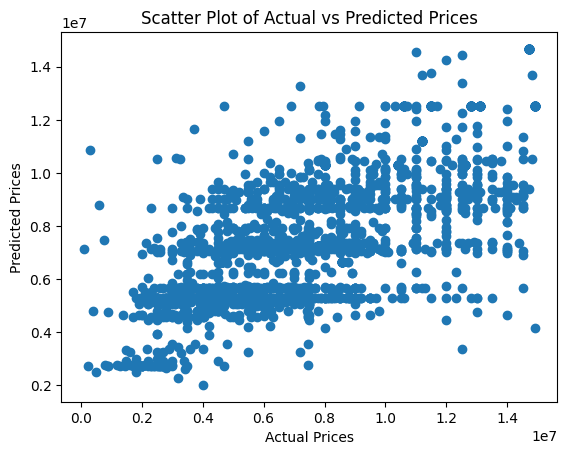

In [58]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Scatter Plot of Actual vs Predicted Prices')
plt.show()

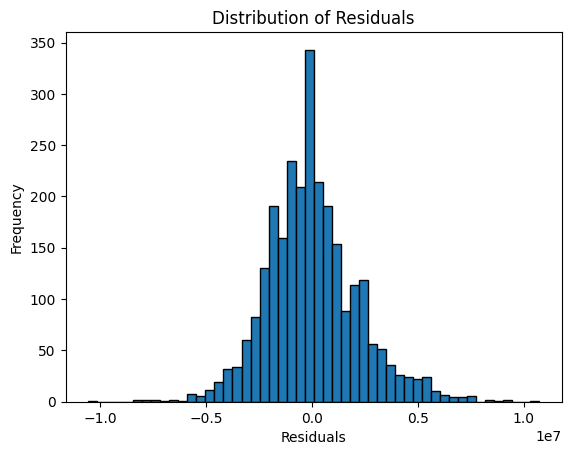

In [59]:
# Distribution plot for residuals
residuals = Y_test - Y_pred
plt.hist(residuals, bins=50, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

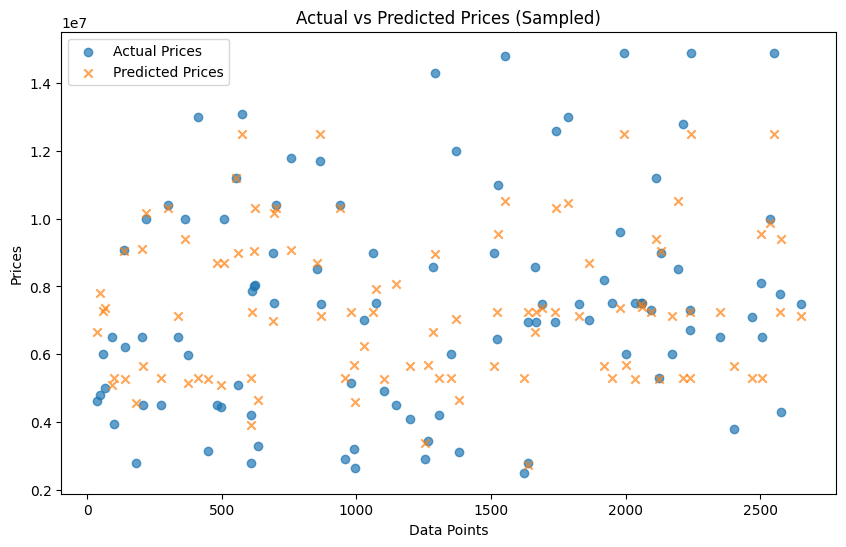

In [60]:
# Sample 100 random data points
sample_indices = np.random.choice(len(Y_test), size=100, replace=False)

# Plot the sampled data
plt.figure(figsize=(10, 6))
plt.scatter(sample_indices, Y_test[sample_indices], label='Actual Prices', marker='o', alpha=0.7)
plt.scatter(sample_indices, Y_pred[sample_indices], label='Predicted Prices', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Prices (Sampled)')
plt.xlabel('Data Points')
plt.ylabel('Prices')
plt.legend()
plt.show()

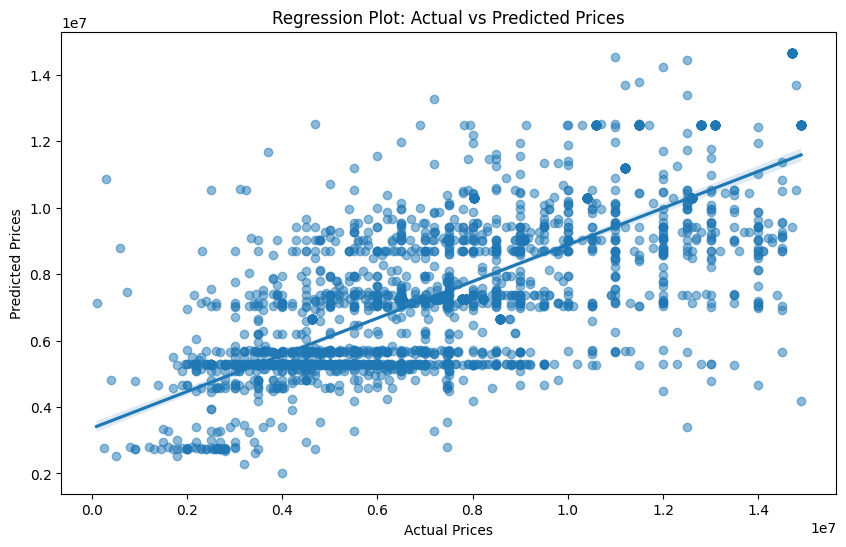

In [61]:
# Plot the regression plot
df_visualize = pd.DataFrame({'Actual Prices': Y_test, 'Predicted Prices': Y_pred})
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual Prices', y='Predicted Prices', data=df_visualize, scatter_kws={'alpha':0.5})
plt.title('Regression Plot: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()